In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
layers = 4
neurons = [32, 32, 16, 1]

In [6]:
import time

In [7]:
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [8]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

Epoch 1. Training MSE: 0.599, Test MSE: 0.624.
Epoch 2. Training MSE: 0.532, Test MSE: 0.547.
Epoch 3. Training MSE: 0.517, Test MSE: 0.534.
Epoch 4. Training MSE: 0.51, Test MSE: 0.529.
Epoch 5. Training MSE: 0.505, Test MSE: 0.523.
Epoch 6. Training MSE: 0.502, Test MSE: 0.521.
Epoch 7. Training MSE: 0.5, Test MSE: 0.519.
Epoch 8. Training MSE: 0.498, Test MSE: 0.519.
Epoch 9. Training MSE: 0.497, Test MSE: 0.518.
Epoch 10. Training MSE: 0.496, Test MSE: 0.517.
Epoch 11. Training MSE: 0.496, Test MSE: 0.517.
Epoch 12. Training MSE: 0.495, Test MSE: 0.516.
Epoch 13. Training MSE: 0.494, Test MSE: 0.516.
Epoch 14. Training MSE: 0.494, Test MSE: 0.516.
Epoch 15. Training MSE: 0.493, Test MSE: 0.516.
Epoch 16. Training MSE: 0.493, Test MSE: 0.515.
Epoch 17. Training MSE: 0.493, Test MSE: 0.515.
Epoch 18. Training MSE: 0.492, Test MSE: 0.515.
Epoch 19. Training MSE: 0.492, Test MSE: 0.515.
Epoch 20. Training MSE: 0.492, Test MSE: 0.515.
Calculation time for 100 particles: 13.5166133165359

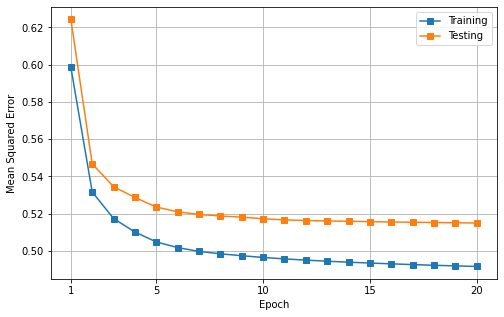

Epoch 1. Training MSE: 0.75, Test MSE: 0.754.
Epoch 2. Training MSE: 0.564, Test MSE: 0.589.
Epoch 3. Training MSE: 0.521, Test MSE: 0.544.
Epoch 4. Training MSE: 0.498, Test MSE: 0.533.
Epoch 5. Training MSE: 0.481, Test MSE: 0.512.
Epoch 6. Training MSE: 0.47, Test MSE: 0.507.
Epoch 7. Training MSE: 0.464, Test MSE: 0.505.
Epoch 8. Training MSE: 0.46, Test MSE: 0.503.
Epoch 9. Training MSE: 0.456, Test MSE: 0.5.
Epoch 10. Training MSE: 0.453, Test MSE: 0.497.
Epoch 11. Training MSE: 0.451, Test MSE: 0.496.
Epoch 12. Training MSE: 0.45, Test MSE: 0.495.
Epoch 13. Training MSE: 0.448, Test MSE: 0.495.
Epoch 14. Training MSE: 0.447, Test MSE: 0.495.
Epoch 15. Training MSE: 0.446, Test MSE: 0.495.
Epoch 16. Training MSE: 0.445, Test MSE: 0.495.
Epoch 17. Training MSE: 0.444, Test MSE: 0.494.
Epoch 18. Training MSE: 0.444, Test MSE: 0.494.
Epoch 19. Training MSE: 0.443, Test MSE: 0.494.
Epoch 20. Training MSE: 0.442, Test MSE: 0.494.
Calculation time for 200 particles: 27.33053464492162 m

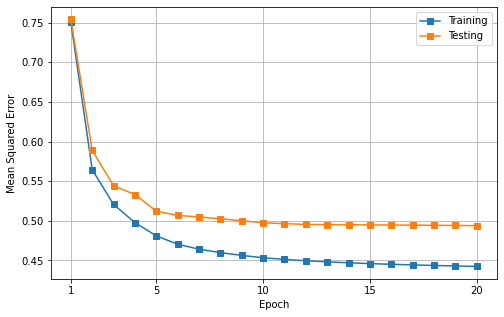

Epoch 1. Training MSE: 0.782, Test MSE: 0.779.
Epoch 2. Training MSE: 0.601, Test MSE: 0.603.
Epoch 3. Training MSE: 0.55, Test MSE: 0.569.
Epoch 4. Training MSE: 0.522, Test MSE: 0.537.
Epoch 5. Training MSE: 0.492, Test MSE: 0.515.
Epoch 6. Training MSE: 0.475, Test MSE: 0.505.
Epoch 7. Training MSE: 0.463, Test MSE: 0.496.
Epoch 8. Training MSE: 0.454, Test MSE: 0.491.
Epoch 9. Training MSE: 0.449, Test MSE: 0.488.
Epoch 10. Training MSE: 0.444, Test MSE: 0.485.
Epoch 11. Training MSE: 0.441, Test MSE: 0.484.
Epoch 12. Training MSE: 0.438, Test MSE: 0.483.
Epoch 13. Training MSE: 0.435, Test MSE: 0.482.
Epoch 14. Training MSE: 0.433, Test MSE: 0.481.
Epoch 15. Training MSE: 0.431, Test MSE: 0.48.
Epoch 16. Training MSE: 0.43, Test MSE: 0.479.
Epoch 17. Training MSE: 0.428, Test MSE: 0.478.
Epoch 18. Training MSE: 0.427, Test MSE: 0.477.
Epoch 19. Training MSE: 0.426, Test MSE: 0.476.
Epoch 20. Training MSE: 0.425, Test MSE: 0.476.
Calculation time for 300 particles: 41.5557465513547

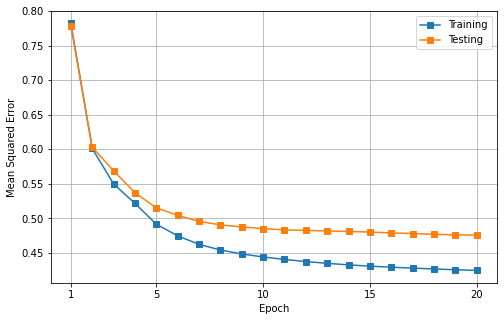

Epoch 1. Training MSE: 0.794, Test MSE: 0.792.
Epoch 2. Training MSE: 0.682, Test MSE: 0.686.
Epoch 3. Training MSE: 0.59, Test MSE: 0.603.
Epoch 4. Training MSE: 0.588, Test MSE: 0.615.
Epoch 5. Training MSE: 0.552, Test MSE: 0.577.
Epoch 6. Training MSE: 0.534, Test MSE: 0.556.
Epoch 7. Training MSE: 0.501, Test MSE: 0.52.
Epoch 8. Training MSE: 0.477, Test MSE: 0.503.
Epoch 9. Training MSE: 0.464, Test MSE: 0.491.
Epoch 10. Training MSE: 0.453, Test MSE: 0.482.
Epoch 11. Training MSE: 0.444, Test MSE: 0.473.
Epoch 12. Training MSE: 0.436, Test MSE: 0.47.
Epoch 13. Training MSE: 0.431, Test MSE: 0.467.
Epoch 14. Training MSE: 0.426, Test MSE: 0.468.
Epoch 15. Training MSE: 0.423, Test MSE: 0.468.
Epoch 16. Training MSE: 0.419, Test MSE: 0.468.
Epoch 17. Training MSE: 0.416, Test MSE: 0.468.
Epoch 18. Training MSE: 0.414, Test MSE: 0.467.
Epoch 19. Training MSE: 0.411, Test MSE: 0.467.
Epoch 20. Training MSE: 0.409, Test MSE: 0.468.
Calculation time for 400 particles: 56.5878318031628

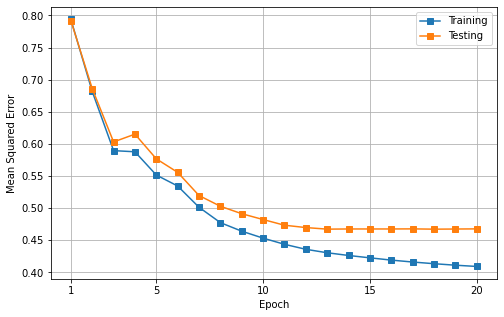

Epoch 1. Training MSE: 0.773, Test MSE: 0.773.
Epoch 2. Training MSE: 0.63, Test MSE: 0.643.
Epoch 3. Training MSE: 0.592, Test MSE: 0.623.
Epoch 4. Training MSE: 0.639, Test MSE: 0.675.
Epoch 5. Training MSE: 0.62, Test MSE: 0.658.
Epoch 6. Training MSE: 0.616, Test MSE: 0.648.
Epoch 7. Training MSE: 0.524, Test MSE: 0.551.
Epoch 8. Training MSE: 0.482, Test MSE: 0.5.
Epoch 9. Training MSE: 0.463, Test MSE: 0.48.
Epoch 10. Training MSE: 0.451, Test MSE: 0.472.
Epoch 11. Training MSE: 0.441, Test MSE: 0.468.
Epoch 12. Training MSE: 0.432, Test MSE: 0.464.
Epoch 13. Training MSE: 0.425, Test MSE: 0.462.
Epoch 14. Training MSE: 0.42, Test MSE: 0.462.
Epoch 15. Training MSE: 0.416, Test MSE: 0.462.
Epoch 16. Training MSE: 0.412, Test MSE: 0.462.
Epoch 17. Training MSE: 0.409, Test MSE: 0.462.
Epoch 18. Training MSE: 0.405, Test MSE: 0.462.
Epoch 19. Training MSE: 0.402, Test MSE: 0.462.
Epoch 20. Training MSE: 0.4, Test MSE: 0.462.
Calculation time for 500 particles: 73.03277363777161 min

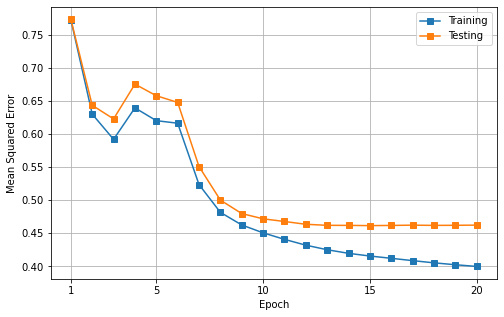

Epoch 1. Training MSE: 0.83, Test MSE: 0.829.
Epoch 2. Training MSE: 0.697, Test MSE: 0.698.
Epoch 3. Training MSE: 0.619, Test MSE: 0.626.
Epoch 4. Training MSE: 0.604, Test MSE: 0.623.
Epoch 5. Training MSE: 0.641, Test MSE: 0.665.
Epoch 6. Training MSE: 0.654, Test MSE: 0.67.
Epoch 7. Training MSE: 0.553, Test MSE: 0.563.
Epoch 8. Training MSE: 0.523, Test MSE: 0.532.
Epoch 9. Training MSE: 0.494, Test MSE: 0.51.
Epoch 10. Training MSE: 0.477, Test MSE: 0.502.
Epoch 11. Training MSE: 0.464, Test MSE: 0.498.
Epoch 12. Training MSE: 0.453, Test MSE: 0.496.
Epoch 13. Training MSE: 0.445, Test MSE: 0.492.
Epoch 14. Training MSE: 0.437, Test MSE: 0.487.
Epoch 15. Training MSE: 0.428, Test MSE: 0.486.
Epoch 16. Training MSE: 0.422, Test MSE: 0.484.
Epoch 17. Training MSE: 0.416, Test MSE: 0.483.
Epoch 18. Training MSE: 0.411, Test MSE: 0.481.
Epoch 19. Training MSE: 0.406, Test MSE: 0.481.
Epoch 20. Training MSE: 0.403, Test MSE: 0.482.
Calculation time for 600 particles: 90.5089964946111

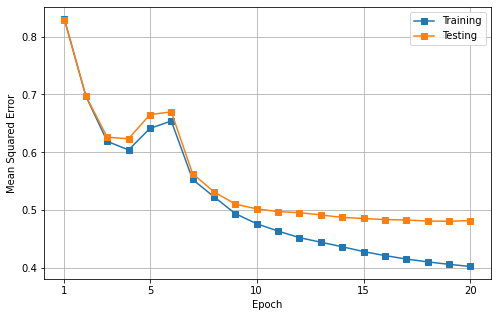

Epoch 1. Training MSE: 0.845, Test MSE: 0.846.
Epoch 2. Training MSE: 0.725, Test MSE: 0.729.
Epoch 3. Training MSE: 0.683, Test MSE: 0.691.
Epoch 4. Training MSE: 0.643, Test MSE: 0.659.
Epoch 5. Training MSE: 0.608, Test MSE: 0.635.
Epoch 6. Training MSE: 0.586, Test MSE: 0.622.
Epoch 7. Training MSE: 0.58, Test MSE: 0.622.
Epoch 8. Training MSE: 0.626, Test MSE: 0.662.
Epoch 9. Training MSE: 0.596, Test MSE: 0.625.
Epoch 10. Training MSE: 0.55, Test MSE: 0.576.
Epoch 11. Training MSE: 0.54, Test MSE: 0.577.
Epoch 12. Training MSE: 0.49, Test MSE: 0.527.
Epoch 13. Training MSE: 0.463, Test MSE: 0.503.
Epoch 14. Training MSE: 0.448, Test MSE: 0.498.
Epoch 15. Training MSE: 0.435, Test MSE: 0.491.
Epoch 16. Training MSE: 0.424, Test MSE: 0.481.
Epoch 17. Training MSE: 0.415, Test MSE: 0.473.
Epoch 18. Training MSE: 0.407, Test MSE: 0.469.
Epoch 19. Training MSE: 0.401, Test MSE: 0.467.
Epoch 20. Training MSE: 0.396, Test MSE: 0.466.
Calculation time for 700 particles: 106.3971443812052

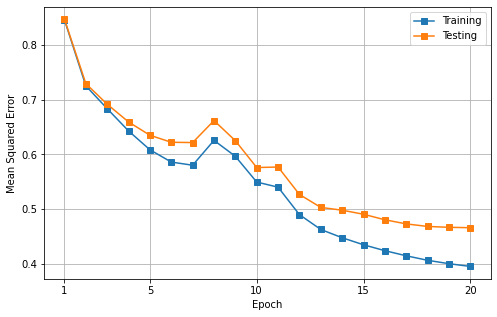

Epoch 1. Training MSE: 0.842, Test MSE: 0.843.
Epoch 2. Training MSE: 0.76, Test MSE: 0.763.
Epoch 3. Training MSE: 0.731, Test MSE: 0.736.
Epoch 4. Training MSE: 0.691, Test MSE: 0.7.
Epoch 5. Training MSE: 0.638, Test MSE: 0.652.
Epoch 6. Training MSE: 0.59, Test MSE: 0.609.
Epoch 7. Training MSE: 0.62, Test MSE: 0.641.
Epoch 8. Training MSE: 0.696, Test MSE: 0.723.
Epoch 9. Training MSE: 0.686, Test MSE: 0.72.
Epoch 10. Training MSE: 0.603, Test MSE: 0.638.
Epoch 11. Training MSE: 0.538, Test MSE: 0.576.
Epoch 12. Training MSE: 0.501, Test MSE: 0.539.
Epoch 13. Training MSE: 0.491, Test MSE: 0.533.
Epoch 14. Training MSE: 0.467, Test MSE: 0.511.
Epoch 15. Training MSE: 0.454, Test MSE: 0.503.
Epoch 16. Training MSE: 0.44, Test MSE: 0.489.
Epoch 17. Training MSE: 0.43, Test MSE: 0.485.
Epoch 18. Training MSE: 0.42, Test MSE: 0.48.
Epoch 19. Training MSE: 0.411, Test MSE: 0.477.
Epoch 20. Training MSE: 0.404, Test MSE: 0.473.
Calculation time for 800 particles: 124.63449760675431 minu

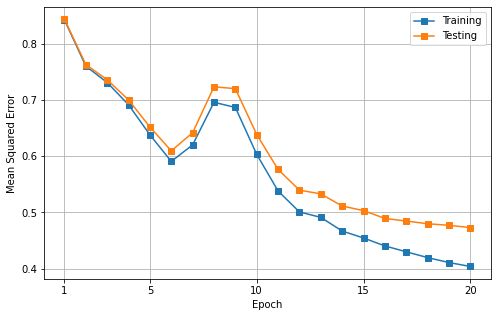

Epoch 1. Training MSE: 0.922, Test MSE: 0.923.
Epoch 2. Training MSE: 0.789, Test MSE: 0.791.
Epoch 3. Training MSE: 0.768, Test MSE: 0.771.
Epoch 4. Training MSE: 0.756, Test MSE: 0.761.
Epoch 5. Training MSE: 0.726, Test MSE: 0.735.
Epoch 6. Training MSE: 0.671, Test MSE: 0.686.
Epoch 7. Training MSE: 0.623, Test MSE: 0.646.
Epoch 8. Training MSE: 0.582, Test MSE: 0.615.
Epoch 9. Training MSE: 0.564, Test MSE: 0.606.
Epoch 10. Training MSE: 0.579, Test MSE: 0.629.
Epoch 11. Training MSE: 0.616, Test MSE: 0.662.
Epoch 12. Training MSE: 0.611, Test MSE: 0.653.
Epoch 13. Training MSE: 0.536, Test MSE: 0.569.
Epoch 14. Training MSE: 0.502, Test MSE: 0.535.
Epoch 15. Training MSE: 0.493, Test MSE: 0.531.
Epoch 16. Training MSE: 0.473, Test MSE: 0.51.
Epoch 17. Training MSE: 0.461, Test MSE: 0.499.
Epoch 18. Training MSE: 0.446, Test MSE: 0.488.
Epoch 19. Training MSE: 0.432, Test MSE: 0.484.
Epoch 20. Training MSE: 0.419, Test MSE: 0.488.
Calculation time for 900 particles: 142.0505142927

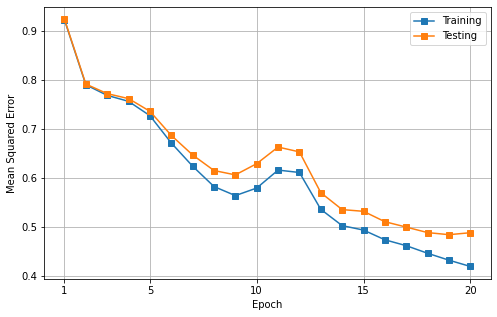

Epoch 1. Training MSE: 0.935, Test MSE: 0.935.
Epoch 2. Training MSE: 0.799, Test MSE: 0.799.
Epoch 3. Training MSE: 0.775, Test MSE: 0.775.
Epoch 4. Training MSE: 0.767, Test MSE: 0.768.
Epoch 5. Training MSE: 0.764, Test MSE: 0.767.
Epoch 6. Training MSE: 0.762, Test MSE: 0.765.
Epoch 7. Training MSE: 0.755, Test MSE: 0.759.
Epoch 8. Training MSE: 0.737, Test MSE: 0.743.
Epoch 9. Training MSE: 0.709, Test MSE: 0.716.
Epoch 10. Training MSE: 0.669, Test MSE: 0.68.
Epoch 11. Training MSE: 0.618, Test MSE: 0.636.
Epoch 12. Training MSE: 0.579, Test MSE: 0.603.
Epoch 13. Training MSE: 0.562, Test MSE: 0.596.
Epoch 14. Training MSE: 0.547, Test MSE: 0.594.
Epoch 15. Training MSE: 0.549, Test MSE: 0.594.
Epoch 16. Training MSE: 0.528, Test MSE: 0.577.
Epoch 17. Training MSE: 0.522, Test MSE: 0.571.
Epoch 18. Training MSE: 0.511, Test MSE: 0.552.
Epoch 19. Training MSE: 0.481, Test MSE: 0.52.
Epoch 20. Training MSE: 0.463, Test MSE: 0.508.
Calculation time for 1000 particles: 181.6155256112

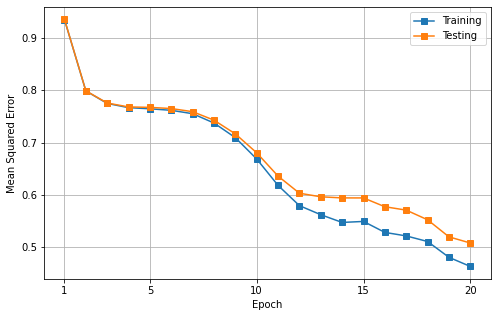

Epoch 1. Training MSE: 0.942, Test MSE: 0.942.
Epoch 2. Training MSE: 0.818, Test MSE: 0.818.
Epoch 3. Training MSE: 0.797, Test MSE: 0.797.
Epoch 4. Training MSE: 0.79, Test MSE: 0.791.
Epoch 5. Training MSE: 0.779, Test MSE: 0.78.
Epoch 6. Training MSE: 0.767, Test MSE: 0.769.
Epoch 7. Training MSE: 0.758, Test MSE: 0.762.
Epoch 8. Training MSE: 0.749, Test MSE: 0.754.
Epoch 9. Training MSE: 0.733, Test MSE: 0.74.
Epoch 10. Training MSE: 0.721, Test MSE: 0.73.
Epoch 11. Training MSE: 0.697, Test MSE: 0.709.
Epoch 12. Training MSE: 0.669, Test MSE: 0.687.
Epoch 13. Training MSE: 0.644, Test MSE: 0.668.
Epoch 14. Training MSE: 0.621, Test MSE: 0.652.
Epoch 15. Training MSE: 0.601, Test MSE: 0.638.
Epoch 16. Training MSE: 0.592, Test MSE: 0.633.
Epoch 17. Training MSE: 0.59, Test MSE: 0.635.
Epoch 18. Training MSE: 0.593, Test MSE: 0.64.
Epoch 19. Training MSE: 0.592, Test MSE: 0.637.
Epoch 20. Training MSE: 0.59, Test MSE: 0.632.
Calculation time for 1500 particles: 268.9910005291303 m

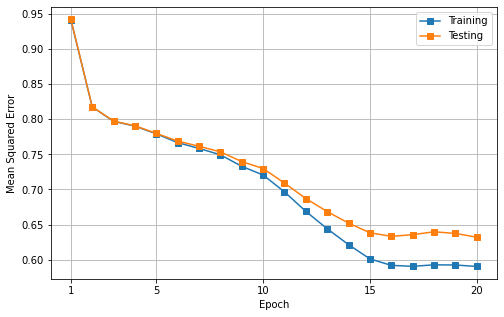

Epoch 1. Training MSE: 0.946, Test MSE: 0.947.
Epoch 2. Training MSE: 0.807, Test MSE: 0.808.
Epoch 3. Training MSE: 0.79, Test MSE: 0.791.
Epoch 4. Training MSE: 0.784, Test MSE: 0.785.
Epoch 5. Training MSE: 0.782, Test MSE: 0.783.
Epoch 6. Training MSE: 0.774, Test MSE: 0.776.
Epoch 7. Training MSE: 0.766, Test MSE: 0.769.
Epoch 8. Training MSE: 0.757, Test MSE: 0.761.
Epoch 9. Training MSE: 0.75, Test MSE: 0.755.
Epoch 10. Training MSE: 0.743, Test MSE: 0.749.
Epoch 11. Training MSE: 0.733, Test MSE: 0.74.
Epoch 12. Training MSE: 0.718, Test MSE: 0.727.
Epoch 13. Training MSE: 0.701, Test MSE: 0.712.
Epoch 14. Training MSE: 0.685, Test MSE: 0.698.
Epoch 15. Training MSE: 0.672, Test MSE: 0.687.
Epoch 16. Training MSE: 0.661, Test MSE: 0.678.
Epoch 17. Training MSE: 0.65, Test MSE: 0.668.
Epoch 18. Training MSE: 0.638, Test MSE: 0.658.
Epoch 19. Training MSE: 0.625, Test MSE: 0.645.
Epoch 20. Training MSE: 0.615, Test MSE: 0.637.
Calculation time for 2000 particles: 373.083504915237

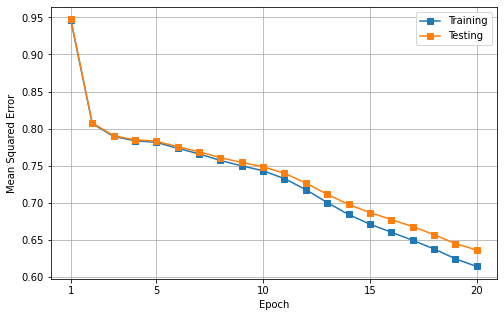

In [9]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor(X_train,
                                                                           X_test,
                                                                           y_train,
                                                                           y_test,
                                                                           layers,
                                                                           neurons,
                                                                           setting_dict,
                                                                           save_all = True,
                                                                           file_var = "../objects/wine/enkf_wine_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                           file_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                           verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [10]:
obj_dict = load_objects("../objects/wine/enkf_wine_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [11]:
final_model = nn_load("../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))